In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import logging
import matplotlib.pyplot as plt

tf.get_logger().setLevel(logging.ERROR)

EPOCHS = 500
BATCH_SIZE = 16

boston_housing = keras.datasets.boston_housing

(raw_x_train, y_train), (raw_x_test, y_test) = boston_housing.load_data()
x_mean = np.mean(raw_x_train, axis=0)
x_stddev = np.std(raw_x_train, axis=0)
x_train = (raw_x_train - x_mean) / x_stddev
x_test = (raw_x_test - x_mean) / x_stddev

In [ ]:
def graph(history):
    mse_train = history.history["loss"]
    mse_val = history.history["val_loss"]

    plt.figure(figsize=(10, 6))
    plt.plot(mse_train, label="Train MSE")
    plt.plot(mse_val, label="Test MSE (Validation)", linestyle="--")
    plt.xlabel("Epoch")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.title("Train vs Test MSE over Epochs")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


model = Sequential()
model.add(
    Dense(64, activation="relu", kernel_initializer="he_normal", input_shape=[13])
)
model.add(Dense(64, activation="relu", kernel_initializer="he_normal"))
model.add(Dense(1, activation="linear"))
model.compile(
    loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"]
)
model.summary()
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=2,
    shuffle=True,
)

predictions = model.predict(x_test)

for i in range(0, 4):
    print(f"Prediction: {predictions[i]} true value {y_test[i]}")

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
26/26 - 1s - 26ms/step - loss: 474.7384 - mean_absolute_error: 19.7439 - val_loss: 369.9049 - val_mean_absolute_error: 17.0532
Epoch 2/500
26/26 - 0s - 4ms/step - loss: 255.4688 - mean_absolute_error: 13.6113 - val_loss: 165.9312 - val_mean_absolute_error: 10.8228
Epoch 3/500
26/26 - 0s - 4ms/step - loss: 105.6022 - mean_absolute_error: 8.0327 - val_loss: 69.6482 - val_mean_absolute_error: 6.7298
Epoch 4/500
26/26 - 0s - 4ms/step - loss: 55.1427 - mean_absolute_error: 5.6748 - val_loss: 47.0469 - val_mean_absolute_error: 5.4346
Epoch 5/500
26/26 - 0s - 4ms/step - loss: 39.9583 - mean_absolute_error: 4.7154 - val_loss: 35.8032 - val_mean_absolute_error: 4.6934
Epoch 6/500
26/26 - 0s - 3ms/step - loss: 30.9181 - mean_absolute_error: 4.1304 - val_loss: 29.6757 - val_mean_absolute_error: 4.2763
Epoch 7/500
26/26 - 0s - 4ms/step - loss: 26.5948 - mean_absolute_error: 3.7722 - val_loss: 26.0719 - val_mean_absolute_error: 4.0014
Epoch 8/500
26/26 - 0s - 4ms/step - loss: 23.4212 - 

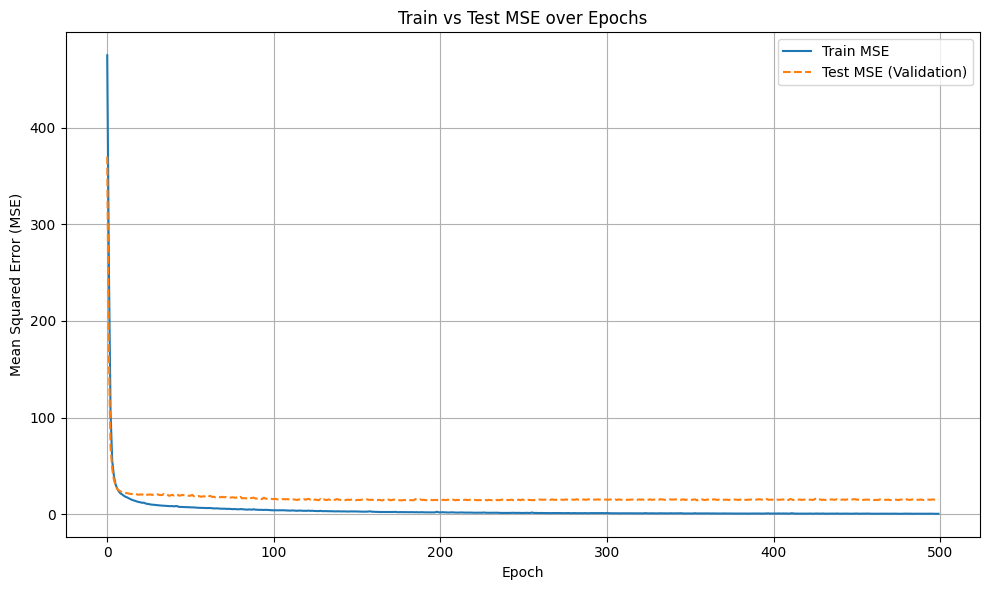

In [17]:
graph(history)

In [ ]:
model = Sequential()

model.add(Dense(1, activation="linear", input_shape=[13]))
model.compile(
    loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"]
)
model.summary()
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=2,
    shuffle=True,
)

predictions = model.predict(x_test)

for i in range(0, 4):
    print(f"Prediction: {predictions[i]} true value {y_test[i]}")

/home/erich/dev/nvidia_book/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 1)              │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14 (56.00 B)

 Trainable params: 14 (56.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
26/26 - 0s - 17ms/step - loss: 577.0741 - mean_absolute_error: 22.3862 - val_loss: 609.8539 - val_mean_absolute_error: 23.0952
Epoch 2/500
26/26 - 0s - 3ms/step - loss: 574.6937 - mean_absolute_error: 22.3605 - val_loss: 607.1640 - val_mean_absolute_error: 23.0613
Epoch 3/500
26/26 - 0s - 4ms/step - loss: 572.3658 - mean_absolute_error: 22.3301 - val_loss: 604.7481 - val_mean_absolute_error: 23.0293
Epoch 4/500
26/26 - 0s - 4ms/step - loss: 570.2423 - mean_absolute_error: 22.3078 - val_loss: 601.9769 - val_mean_absolute_error: 22.9953
Epoch 5/500
26/26 - 0s - 4ms/step - loss: 567.9479 - mean_absolute_error: 22.2801 - val_loss: 599.5246 - val_mean_absolute_error: 22.9627
Epoch 6/500
26/26 - 0s - 4ms/step - loss: 565.9197 - mean_absolute_error: 22.2577 - val_loss: 596.8715 - val_mean_absolute_error: 22.9292
Epoch 7/500
26/26 - 0s - 3ms/step - loss: 563.7371 - mean_absolute_error: 22.2285 - val_loss: 594.5397 - val_mean_absolute_error: 22.8970
Epoch 8/500
26/26 - 0s - 4ms/step

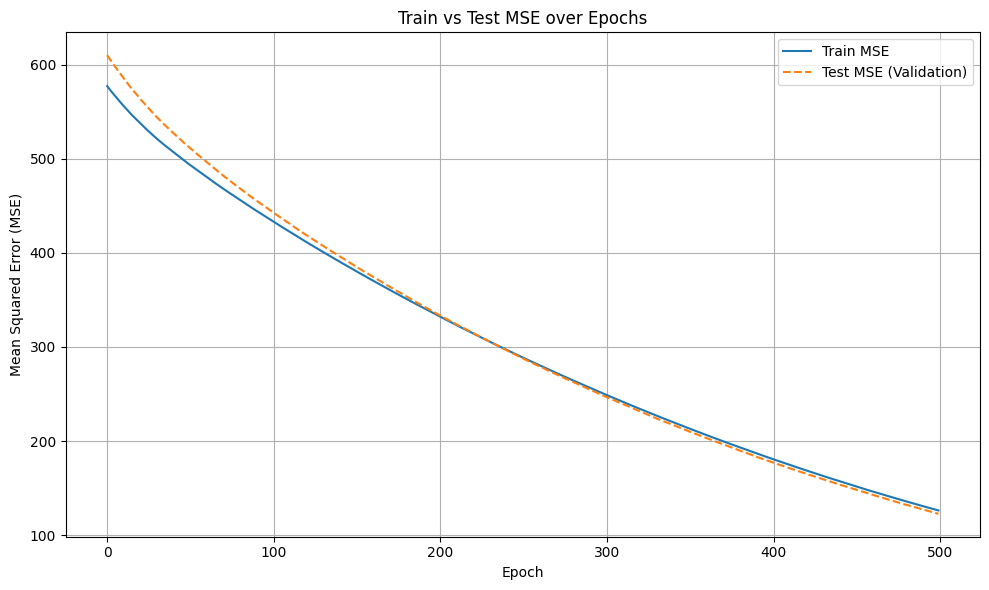

In [ ]:
import matplotlib.pyplot as plt

mse_train = history.history["loss"]
mse_val = history.history["val_loss"]

plt.figure(figsize=(10, 6))
plt.plot(mse_train, label="Train MSE")
plt.plot(mse_val, label="Test MSE (Validation)", linestyle="--")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Train vs Test MSE over Epochs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Improoving Generalization with Regularizacion 


a regularization technique is a technique that focises on reducing the gap between 

In [19]:
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(
    Dense(64, activation="relu", kernel_initializer="he_normal", kernel_regularizer=l2(0.1),bias_regularizer=l2(0.1), input_shape=[13])
)
model.add(Dense(64, activation="relu", kernel_initializer="he_normal", kernel_regularizer=l2(0.1),bias_regularizer=l2(0.1)))
model.add(Dense(1, activation="linear", kernel_regularizer=l2(0.1),bias_regularizer=l2(0.1)))
model.compile(
    loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"]
)
model.summary()
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=2,
    shuffle=True,
)

predictions = model.predict(x_test)

for i in range(0, 4):
    print(f"Prediction: {predictions[i]} true value {y_test[i]}")

/home/erich/dev/nvidia_book/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
26/26 - 1s - 32ms/step - loss: 566.6758 - mean_absolute_error: 21.3552 - val_loss: 486.5292 - val_mean_absolute_error: 19.4298
Epoch 2/500
26/26 - 0s - 4ms/step - loss: 372.7292 - mean_absolute_error: 16.1955 - val_loss: 289.4219 - val_mean_absolute_error: 14.2549
Epoch 3/500
26/26 - 0s - 4ms/step - loss: 202.9799 - mean_absolute_error: 10.7743 - val_loss: 133.1400 - val_mean_absolute_error: 8.6781
Epoch 4/500
26/26 - 0s - 6ms/step - loss: 102.0904 - mean_absolute_error: 6.5431 - val_loss: 77.4615 - val_mean_absolute_error: 5.6757
Epoch 5/500
26/26 - 0s - 4ms/step - loss: 71.3465 - mean_absolute_error: 5.0395 - val_loss: 63.9635 - val_mean_absolute_error: 4.7709
Epoch 6/500
26/26 - 0s - 4ms/step - loss: 59.7644 - mean_absolute_error: 4.3092 - val_loss: 57.8492 - val_mean_absolute_error: 4.2798
Epoch 7/500
26/26 - 0s - 4ms/step - loss: 54.1537 - mean_absolute_error: 3.9273 - val_loss: 55.3957 - val_mean_absolute_error: 4.0456
Epoch 8/500
26/26 - 0s - 4ms/step - loss: 50.5615

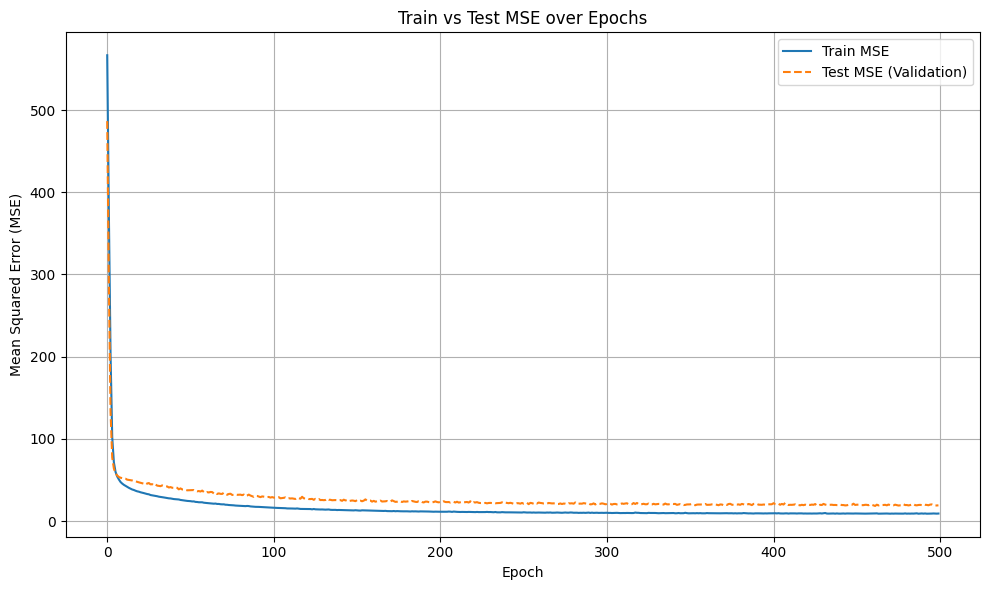

In [20]:
graph(history)

## Dropout 

In [21]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(
    Dense(64, activation="relu", kernel_initializer="he_normal", input_shape=[13])
)
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu", kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="linear"))
model.compile(
    loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"]
)
model.summary()
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=2,
    shuffle=True,
)
# Dropout blocks the connection
predictions = model.predict(x_test) 

for i in range(0, 4):
    print(f"Prediction: {predictions[i]} true value {y_test[i]}")

/home/erich/dev/nvidia_book/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
26/26 - 1s - 32ms/step - loss: 508.7270 - mean_absolute_error: 20.6610 - val_loss: 409.1973 - val_mean_absolute_error: 18.5986
Epoch 2/500
26/26 - 0s - 4ms/step - loss: 297.9023 - mean_absolute_error: 15.2722 - val_loss: 198.0546 - val_mean_absolute_error: 12.5313
Epoch 3/500
26/26 - 0s - 5ms/step - loss: 130.5673 - mean_absolute_error: 9.3097 - val_loss: 62.6479 - val_mean_absolute_error: 6.6398
Epoch 4/500
26/26 - 0s - 4ms/step - loss: 71.1893 - mean_absolute_error: 6.2922 - val_loss: 39.6935 - val_mean_absolute_error: 5.0701
Epoch 5/500
26/26 - 0s - 4ms/step - loss: 55.2836 - mean_absolute_error: 5.3739 - val_loss: 33.6390 - val_mean_absolute_error: 4.5847
Epoch 6/500
26/26 - 0s - 4ms/step - loss: 42.1432 - mean_absolute_error: 4.8154 - val_loss: 29.8540 - val_mean_absolute_error: 4.2928
Epoch 7/500
26/26 - 0s - 5ms/step - loss: 46.8483 - mean_absolute_error: 4.9811 - val_loss: 28.2099 - val_mean_absolute_error: 4.1172
Epoch 8/500
26/26 - 0s - 4ms/step - loss: 41.0131 - 

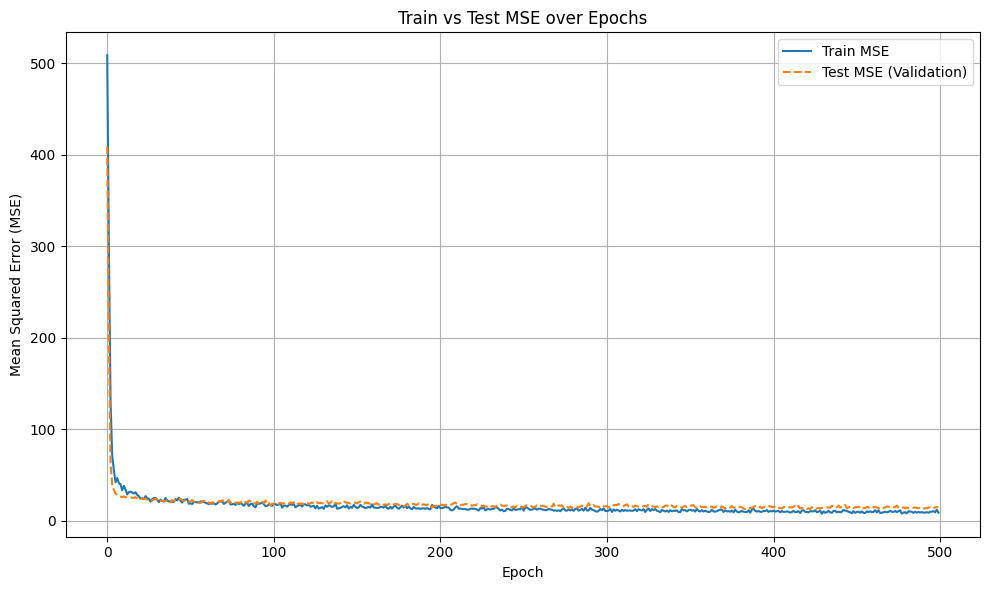

In [22]:
graph(history)

In [25]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(
    Dense(128, activation="relu", kernel_initializer="he_normal", input_shape=[13])
)
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu", kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu", kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="linear"))
model.compile(
    loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"]
)
model.summary()
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=2,
    shuffle=True,
)
# Dropout blocks the connection
predictions = model.predict(x_test) 

for i in range(0, 4):
    print(f"Prediction: {predictions[i]} true value {y_test[i]}")

/home/erich/dev/nvidia_book/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,625 (104.00 KB)

 Trainable params: 26,625 (104.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
26/26 - 1s - 49ms/step - loss: 307.6519 - mean_absolute_error: 14.8503 - val_loss: 81.5322 - val_mean_absolute_error: 7.5301
Epoch 2/500
26/26 - 0s - 4ms/step - loss: 88.4250 - mean_absolute_error: 7.0602 - val_loss: 48.0707 - val_mean_absolute_error: 5.6132
Epoch 3/500
26/26 - 0s - 5ms/step - loss: 56.8012 - mean_absolute_error: 5.7383 - val_loss: 28.4828 - val_mean_absolute_error: 3.9948
Epoch 4/500
26/26 - 0s - 4ms/step - loss: 40.0460 - mean_absolute_error: 4.7059 - val_loss: 32.3204 - val_mean_absolute_error: 4.2740
Epoch 5/500
26/26 - 0s - 5ms/step - loss: 38.1576 - mean_absolute_error: 4.4903 - val_loss: 25.0947 - val_mean_absolute_error: 3.5998
Epoch 6/500
26/26 - 0s - 4ms/step - loss: 34.3285 - mean_absolute_error: 4.4593 - val_loss: 24.6959 - val_mean_absolute_error: 3.4761
Epoch 7/500
26/26 - 0s - 4ms/step - loss: 27.9966 - mean_absolute_error: 3.9912 - val_loss: 24.3702 - val_mean_absolute_error: 3.4820
Epoch 8/500
26/26 - 0s - 4ms/step - loss: 32.6706 - mean_ab

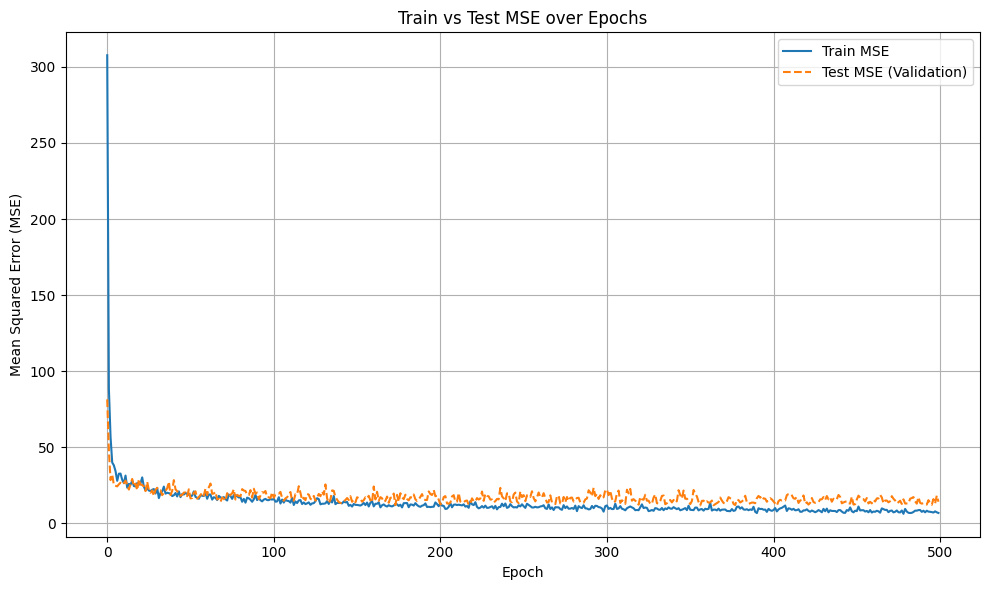

In [26]:
graph(history)

In [27]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(
    Dense(128, activation="relu", kernel_initializer="he_normal", input_shape=[13])
)
model.add(Dropout(0.3))
model.add(Dense(128, activation="relu", kernel_initializer="he_normal"))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu", kernel_initializer="he_normal"))
model.add(Dropout(0.3))
model.add(Dense(1, activation="linear"))
model.compile(
    loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"]
)
model.summary()
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=2,
    shuffle=True,
)
# Dropout blocks the connection
predictions = model.predict(x_test) 

for i in range(0, 4):
    print(f"Prediction: {predictions[i]} true value {y_test[i]}")

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,625 (104.00 KB)

 Trainable params: 26,625 (104.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
26/26 - 2s - 62ms/step - loss: 354.9949 - mean_absolute_error: 16.1322 - val_loss: 139.8008 - val_mean_absolute_error: 9.7446
Epoch 2/500
26/26 - 0s - 6ms/step - loss: 116.7292 - mean_absolute_error: 8.2394 - val_loss: 56.6770 - val_mean_absolute_error: 5.8932
Epoch 3/500
26/26 - 0s - 7ms/step - loss: 61.8701 - mean_absolute_error: 5.9051 - val_loss: 37.4943 - val_mean_absolute_error: 4.5914
Epoch 4/500
26/26 - 0s - 7ms/step - loss: 52.3670 - mean_absolute_error: 5.4514 - val_loss: 34.3348 - val_mean_absolute_error: 4.3634
Epoch 5/500
26/26 - 0s - 7ms/step - loss: 46.1432 - mean_absolute_error: 5.1856 - val_loss: 34.4936 - val_mean_absolute_error: 4.4282
Epoch 6/500
26/26 - 0s - 7ms/step - loss: 39.9916 - mean_absolute_error: 4.7669 - val_loss: 34.0505 - val_mean_absolute_error: 4.5035
Epoch 7/500
26/26 - 0s - 8ms/step - loss: 44.2190 - mean_absolute_error: 5.0216 - val_loss: 27.2783 - val_mean_absolute_error: 3.7801
Epoch 8/500
26/26 - 0s - 7ms/step - loss: 44.7232 - mean_

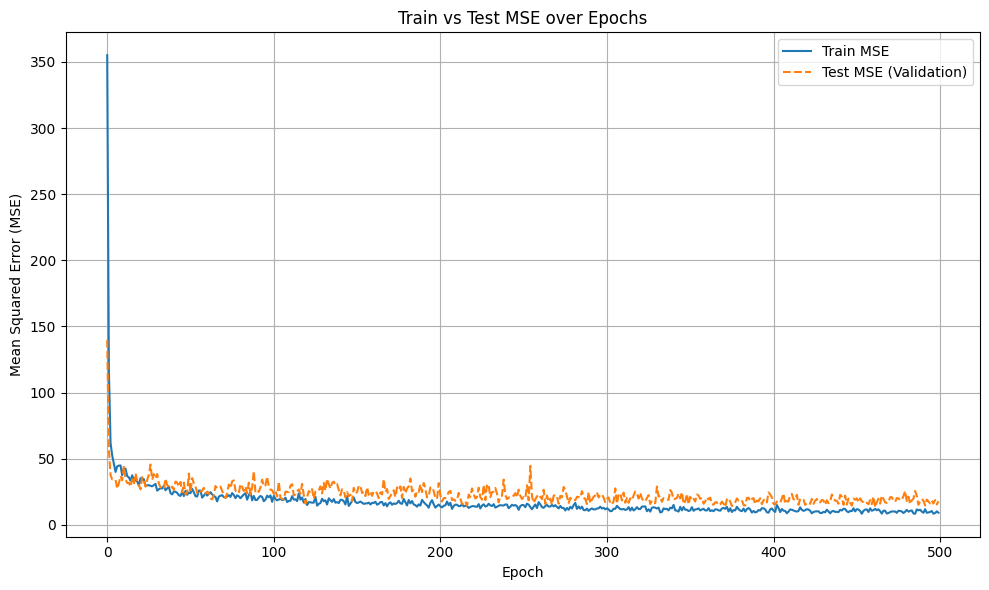

In [28]:
graph(history)